# Basic data analysis (using clustering and k-means)
Unsupervised discrete learning - Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group.

# How it works
According to scikit-learn.org using sklearn.cluster.KMeans, where the k-means problem is solved using either Lloyd’s or Elkan’s algorithm. Code source https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/cluster/k_means_.py#L771

In [1]:
# default values for the k-means in sklearn library
from sklearn.cluster import KMeans
k_means = KMeans()
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Prepares the data
Data set comes from kaggle https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python 
"Content:
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly."

## Imports necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

## Loads data set from csv

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Checks if there are any missing values in the data set

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
'''
if there were any missing values, then eg:
1.Filling all missing values with 0's
df = df.fillna(0)

2.Filling missing values in column 'Gender' with default value 'Female'
df['Gender'] = df['Gender'].fillna('Female')

3. Delete all rows where there is at least one missing value
df = df.dropna()

And much more different approaches!
'''

"\nif there were any missing values, then eg:\n1.Filling all missing values with 0's\ndf = df.fillna(0)\n\n2.Filling missing values in column 'Gender' with default value 'Female'\ndf['Gender'] = df['Gender'].fillna('Female')\n\n3. Delete all rows where there is at least one missing value\ndf = df.dropna()\n\nAnd much more different approaches!\n"

## General statistics

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Changes categorical data to numerical (label encoding)

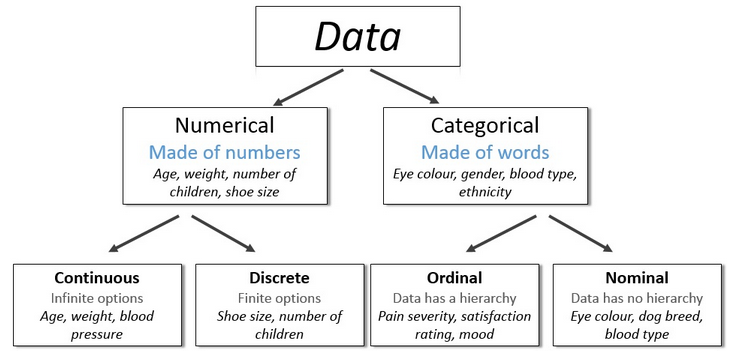

In [8]:
# There may be different types of data: numerical and categorical
Image(filename='dtypes.png')

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df['Gender'] = df['Gender'].astype('category')

In [11]:
df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [12]:
df['Gender'] = df['Gender'].cat.codes

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
df.dtypes

CustomerID                int64
Gender                     int8
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

## One hot encoding
It is important because sometimes using label encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results. We want the model to treat values from gender column equally.

In [15]:
df['if_man'] = 0
df['if_woman'] = 0

In [16]:
# Assiging the value 1 to proper columns
df.loc[df['Gender']  == 1, 'if_man'] = 1
df.loc[df['Gender']  == 0,'if_woman'] = 1

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),if_man,if_woman
0,1,1,19,15,39,1,0
1,2,1,21,15,81,1,0
2,3,0,20,16,6,0,1
3,4,0,23,16,77,0,1
4,5,0,31,17,40,0,1


# Basic analysis 

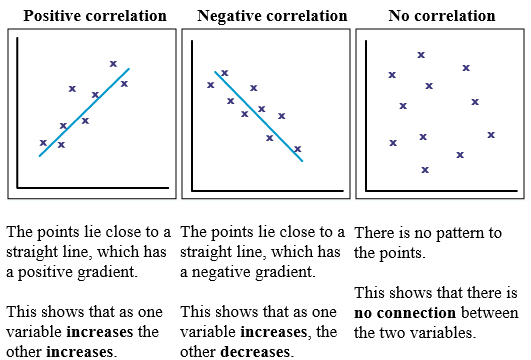

In [18]:
Image(filename='corr.png')

## Correlations between given features

    r value     Strength
    0.0 – 0.2     Weak correlation
    0.3 – 0.6     Moderate correlation
    0.7 – 1.0     Strong correlation
    
    Using pandas.DataFrame.corr:
    method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
        
    pearson : standard correlation coefficient
    kendall : Kendall Tau correlation coefficient
    spearman : Spearman rank correlation
    callable: callable with input two 1d ndarrays

## Difference between correlation and causation

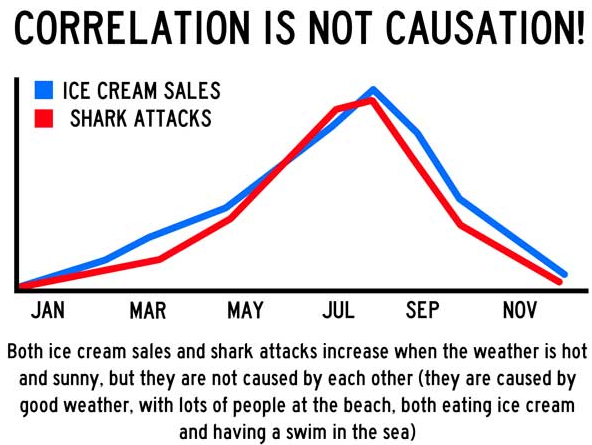

In [19]:
Image(filename='cause.png')

In [20]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),if_man,if_woman
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835,0.057400,-0.057400
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109,1.000000,-1.000000
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227,0.060867,-0.060867
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903,0.056410,-0.056410
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000,-0.058109,0.058109
if_man,0.057400,1.000000,0.060867,0.056410,-0.058109,1.000000,-1.000000
if_woman,-0.057400,-1.000000,-0.060867,-0.056410,0.058109,-1.000000,1.000000


## Plotting spending score with greatest correlation feature

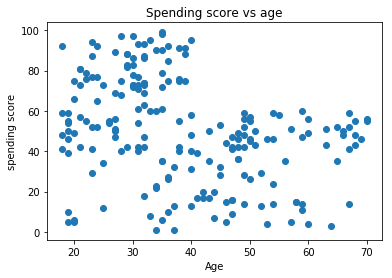

In [21]:
x = df['Age']
y = df['Spending Score (1-100)']

plt.scatter(x,y)
plt.ylabel('spending score')
plt.xlabel('Age')
plt.title('Spending score vs age')

plt.show()

# Prepares for k-means usage

## Determining the number of clusters (value of K)

In [22]:
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[['Age','Spending Score (1-100)']])
    Sum_of_squared_distances.append(km.inertia_)

In [23]:
# Below is a plot of sum of squared distances for k in the range specified above.
# If the plot looks like an arm, then the elbow on the arm is optimal k.

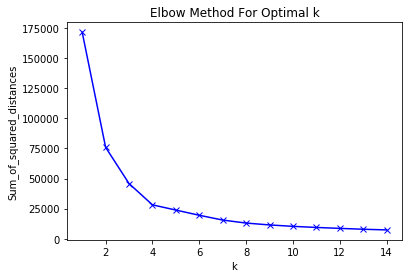

In [24]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Reshaping the data from 1D to 2D (because of algorithm requirements)
An array of arrays is known as 2D array. The two dimensional (2D) array in C programming is also known as matrix. A matrix can be represented as a table of rows and columns

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),if_man,if_woman
0,1,1,19,15,39,1,0
1,2,1,21,15,81,1,0
2,3,0,20,16,6,0,1
3,4,0,23,16,77,0,1
4,5,0,31,17,40,0,1


In [26]:
x = df[['Age','Spending Score (1-100)']]

In [27]:
# .values creates two dimensional array that is needed for the alogirithm to work
x = x.values
# we can show first five rows of the array with this function
x[:5,:]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

## Applying the algorithm to the data

In [28]:
# Using KMeans() function
k_means = KMeans(n_clusters = 4)

y_means = k_means.fit_predict(x)
y_means

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [29]:
# Creates new column Cluster Group in data frame
df['Cluster_Group'] = y_means
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),if_man,if_woman,Cluster_Group
0,1,1,19,15,39,1,0,3
1,2,1,21,15,81,1,0,0
2,3,0,20,16,6,0,1,1
3,4,0,23,16,77,0,1,0
4,5,0,31,17,40,0,1,3


## Plotting the results

In [30]:
x[:5,:]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

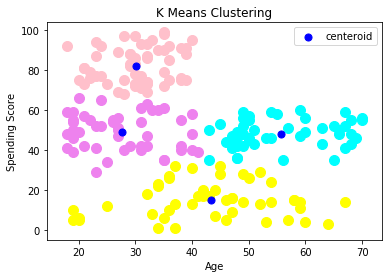

In [31]:
# example of values inside plot function plt.scatter(x-axis, yaxis, s=100, c='pink')

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'violet')
            
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Predicts new client's cluster group

In [32]:
k_means = KMeans(n_clusters = 4)
y_means = k_means.fit(x)
a = [[25,70]]
new_client = k_means.predict(a)
new_client

array([1], dtype=int32)

# Multivariable model

In [33]:
# create variable with more chosen features
y = df[['Age','Spending Score (1-100)','Annual Income (k$)','if_man','if_woman']]

In [36]:
y.head()

,Age,Spending Score (1-100),Annual Income (k$),if_man,if_woman
0,19,39,15,1,0
1,21,81,15,1,0
2,20,6,16,0,1
3,23,77,16,0,1
4,31,40,17,0,1


In [37]:
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(y)
    Sum_of_squared_distances.append(km.inertia_)

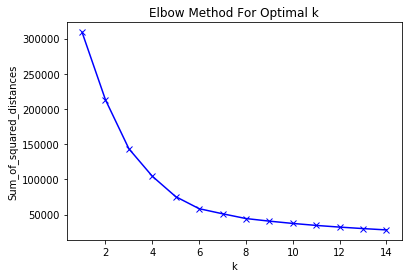

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
k_means = KMeans(n_clusters = 5)
y_means = k_means.fit_predict(y)
y_means

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [40]:
df['Multivariable_Groups'] = y_means

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),if_man,if_woman,Cluster_Group,Multivariable_Groups
0,1,1,19,15,39,1,0,3,1
1,2,1,21,15,81,1,0,0,0
2,3,0,20,16,6,0,1,1,1
3,4,0,23,16,77,0,1,0,0
4,5,0,31,17,40,0,1,3,1
